In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

## Combinatorial Laplacian with random graphs

ER graph

least eigenvalue: 

[-7.105427357601002e-14, 81.29021581226486, 81.46360045108904]


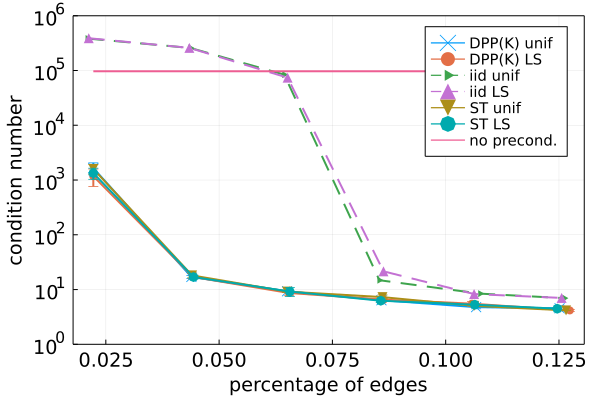

In [2]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


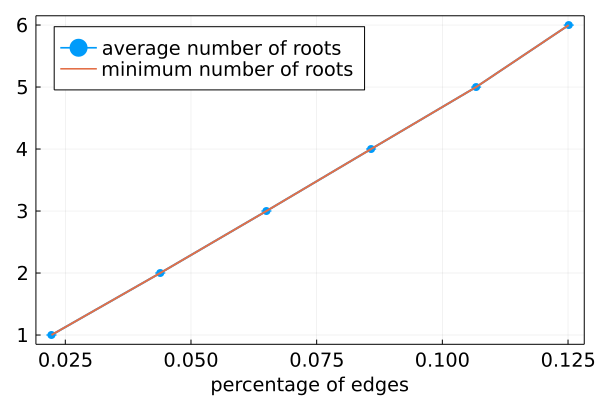

In [3]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

 SBM graph

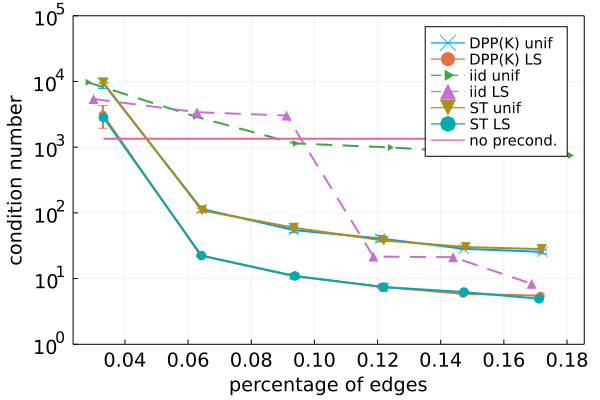

least eigenvalue: [-1.3452780556758801e-13, 0.018570717892125888, 8.21968391274451]


In [4]:
rng = Random.default_rng()

# graph parameters
c = [100 0.01 ;
0.01 20]
n = [400 ; 400]

# regularization parameter
q = 0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


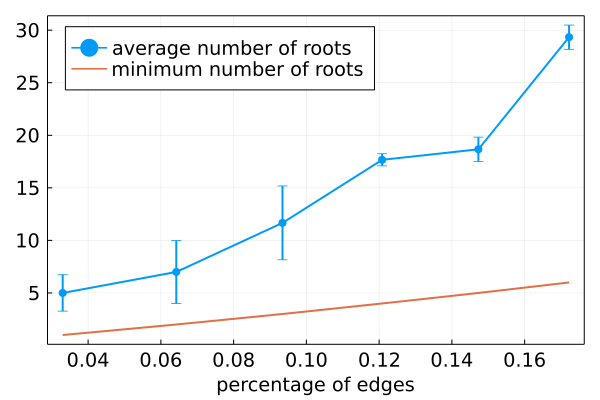

In [5]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian with random graphs

MUN graph model

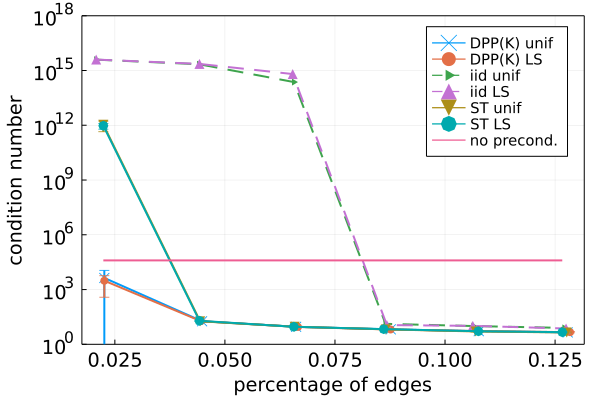

least eigenvalue: [0.002462007849558745, 79.14234201356743, 80.1527343194679]


In [9]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


ERO graph model

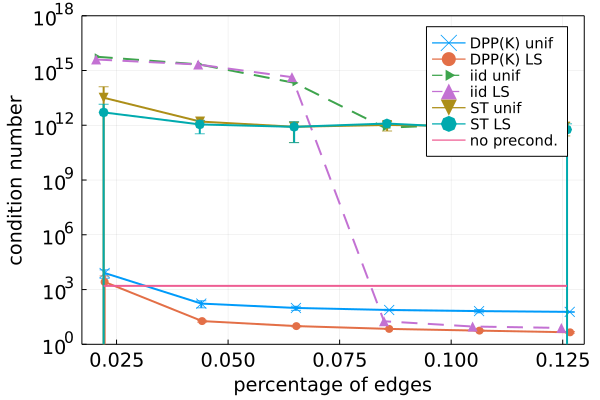

least eigenvalue: [0.0612173431179599, 78.95926517507075, 79.80781623475559]


In [10]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [11]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [12]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

MersenneTwister(0x656ccb4cc64ceb3aeb55bd9ebea55dee, (0, 70686960, 69903462, 585, 70685706, 819))

In [16]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

[-1.5459964038122553e-14 0.1686915082835274 0.2995466222821694 0.3757636827554054 0.37918734738590293]


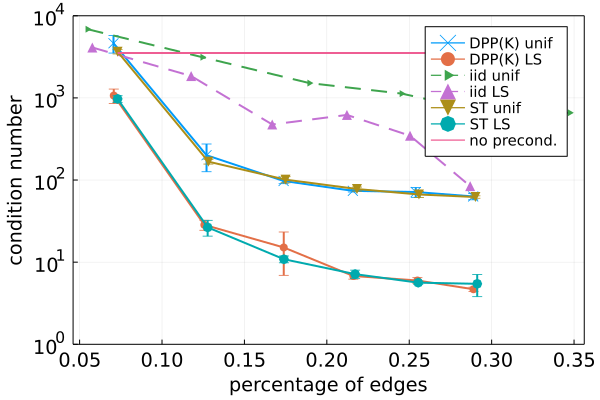

In [14]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")

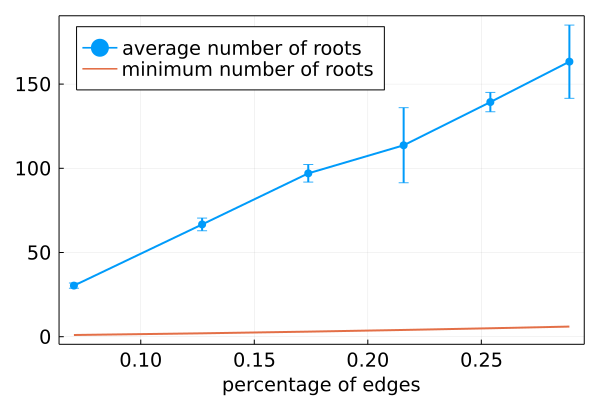

In [15]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)